# National ID Card Recognition

## Project Overview
In this Capstone project, you'll embark on creating a National ID Card Recognition system using OCR (Optical Character Recognition) technology. The core of this project involves utilizing Tesseract OCR, a renowned open-source OCR engine, to accurately recognize and extract text from images of national ID cards. Additionally, OpenCV, a powerful open-source computer vision library, will be employed to preprocess the images, enhancing their quality for better text recognition. This project aims to provide practical experience with OCR and computer vision techniques, which are pivotal in the realm of artificial intelligence.

## Setup and Installation
Begin by setting up Tesseract OCR and OpenCV in your development environment. Ensure all necessary libraries and dependencies are installed.

In [36]:
import pandas as pd
import cv2
import pytesseract

import numpy as np
from matplotlib import pyplot as plt
from pytesseract import Output

## Image Preprocessing
Use OpenCV to load ID card images and implement preprocessing steps such as grayscale conversion, noise reduction, and edge detection. Employ the Find Contours method to accurately isolate the ID card from the background and adjust its perspective.

1- load image

In [37]:
def load_image(image_path):
    image = cv2.imread(image_path)
    return image

2- Image preprocessig by changing from BGR to grayscale then applying gaussian blur to reduce the noise then use canny to detect edges

In [38]:
def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    #edged = cv2.Scharr(blur,-1,0,1,5)
    edged = cv2.Canny(blur, 30, 150)
    return edged

In [69]:
def find_and_isolate_card(edged, image):
    contours, _ = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)

    cv2.imshow('Canny Edges After Contouring', edged)
    print("Number of Contours found = " + str(len(contours))) 
    cv2.drawContours(image, contours, -1, (0, 255, 0), 3)
    #cv2.imshow('Contours', image)

    return image

## Text Recognition with Tesseract OCR
Pass the preprocessed images to Tesseract OCR for text extraction. Fine-tune Tesseract's parameters to improve accuracy for the specific layout and text style of national ID cards.

In [41]:
# import os
# os.environ['TESSDATA_PREFIX'] = 'C:\\Program Files\\Tesseract-OCR\\'

# print(f"TESSDATA_PREFIX is set to: {os.environ.get('TESSDATA_PREFIX')}")


In [48]:
import argparse 
ap = argparse.ArgumentParser() 
  
ap.add_argument("-i", "--image", 
                required=True, 
                help="path to input image to be OCR'd") 
ap.add_argument("-c", "--min-conf", 
                type=int, default=0, 
                help="minimum confidence value to filter weak text detection") 
args = vars(ap.parse_args()) 


usage: ipykernel_launcher.py [-h] -i IMAGE [-c MIN_CONF]
ipykernel_launcher.py: error: the following arguments are required: -i/--image


SystemExit: 2

In [64]:
def extract_text(image):
    details = pytesseract.image_to_string(image, lang='ara')
    custom_config = r'--oem 3 --psm 6'
    details = pytesseract.image_to_string(image, lang='ara', config=custom_config)
    print(details)


## Testing and Validation
Test the system with a variety of national ID card images to ensure reliability and accuracy. Validate the extracted data against known information to assess the OCR's performance.

Number of Contours found = 199


Text(0.5, 1.0, 'Warped Image')

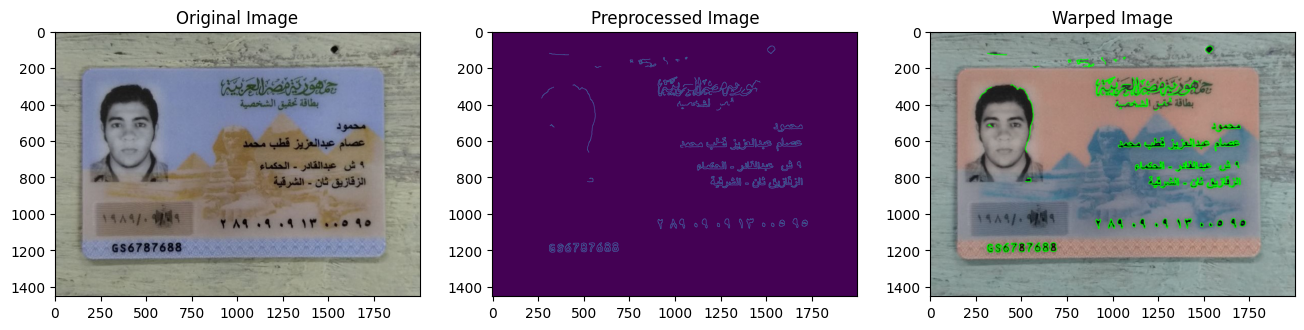

In [70]:
image_path = 'id1.jpg'
plt.figure(figsize=(16, 16))

image = load_image(image_path)
plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

edged = preprocess_image(image)
plt.subplot(1,3,2)
plt.imshow(edged)
plt.title('Preprocessed Image')

warped = find_and_isolate_card(edged, image)
plt.subplot(1,3,3)
plt.imshow(warped)
plt.title('Warped Image')


In [75]:
#details = pytesseract.image_to_string(warped, lang='ara')
custom_config = r'--oem 3 --psm 6'
details = pytesseract.image_to_string(warped, lang='ara', config=custom_config)
print(details)

#“وموشي ل لا د .منج ا د ا ابي

ِ - * لد 177 5 م 1 <

2 3 1 . عي , :
ج< مجع 5 ' ِ

ب لز قا ب لبر ب < اليس

7 - : بجع

.له متم اا ىا 4ه اا : حِ

6567878 ا
: 3 ٍ ب : .. اس اط



In [73]:
text_details = extract_text(warped)
structured_data = structure_text(text_details)
print(structured_data)

#“وموشي ل لا د .منج ا د ا ابي

ِ - * لد 177 5 م 1 <

2 3 1 . عي , :
ج< مجع 5 ' ِ

ب لز قا ب لبر ب < اليس

7 - : بجع

.له متم اا ىا 4ه اا : حِ

6567878 ا
: 3 ٍ ب : .. اس اط



KeyError: 'text'

## Documentation and Sample Uploads
Document the project process, including code, methodologies, and testing procedures. Provide sample ID card images and demonstrate the system's capability to process them and output structured data.

### Conclusion
This project demonstrates the creation of a National ID Card Recognition system using OCR and computer vision techniques. By utilizing Tesseract OCR and OpenCV, we have developed a system capable of extracting and structuring text data from images of national ID cards.